# Project 2

This project uses the American Community Survey (ACS) data set introduced in lab.


For any question requiring to "find", "calculate", or "demonstrate," print out the results so that they will be available during the quiz.

In [70]:
import pandas as pd
import numpy as np
import seaborn as sb

In [71]:
acs_url = "https://github.com/UM-Data-Science-101/data/raw/refs/heads/main/Old/pums_short.csv.gz"
acs = pd.read_csv(acs_url)

## Part 1

### Q1.a

Find the number of rows and columns for the `acs` table:

In [72]:
# solution
print(f"Number of rows: {acs.shape[0]}")
print(f"Number of columns: {acs.shape[1]}")

Number of rows: 276632
Number of columns: 31


Find the names of the columns of the `acs` table:

In [73]:
# solution
print(acs.columns)

Index(['DIVISION', 'PUMA', 'REGION', 'ST', 'NP', 'MRGP', 'RNTP', 'TEN', 'VALP',
       'VEH', 'YBL', 'FES', 'FINCP', 'FPARC', 'HHT', 'HINCP', 'HUPAC', 'MV',
       'NOC', 'NPF', 'NR', 'NRC', 'PARTNER', 'R18', 'R60', 'R65', 'TAXAMT',
       'WIF', 'WKEXREL', 'WORKSTAT', 'FFINCP'],
      dtype='object')


### Q1.b

Using the codebook, investigate the `"R65"` column.

* What information is contained in this column?
* What kind of data is this (quantitative (continuous, discrete) or categorical (nominal, ordinal, binary))?
* Produce a plot that shows the distribution of `"R65"` or its key features.
* Calculate and print out the exact distribution of `"R65"`.

R65: Indicator related to age 65+ (binary indicator-style variable).
Type: Categorical (binary).


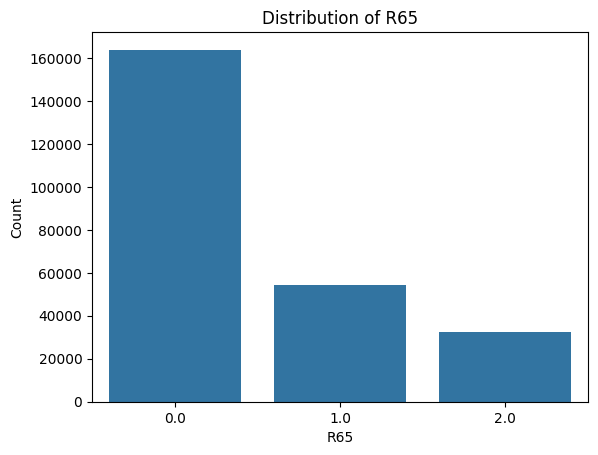


R65 counts:
R65
0.0    163845
1.0     54488
2.0     32686
NaN     25613
Name: count, dtype: int64

R65 proportions:
R65
0.0    0.592285
1.0    0.196969
2.0    0.118157
NaN    0.092589
Name: proportion, dtype: float64


In [74]:
# calculations
import matplotlib.pyplot as plt
print("R65: Indicator related to age 65+ (binary indicator-style variable).")
print("Type: Categorical (binary).")

plt.figure()
sb.countplot(data=acs, x="R65")
plt.title("Distribution of R65")
plt.xlabel("R65")
plt.ylabel("Count")
plt.show()
r65_counts = acs["R65"].value_counts(dropna=False)
r65_props = acs["R65"].value_counts(normalize=True, dropna=False)
print("\nR65 counts:")
print(r65_counts)
print("\nR65 proportions:")
print(r65_props)

### Q1.c

Using the codebook, investigate the `"VALP"` column.

* What information is contained in this column?
* What kind of data is this (quantitative (continuous, discrete) or categorical (nominal, ordinal, binary))?
* Produce a plot that shows the distribution of `"VALP"` or its key features.
* Using numerical summaries, compute the proportion of households that are have less than 50,000 in property value, less than 100,000 in property value, and less than 200,000 in property value.
* Compute the 0.1, 0.5, and 0.75 quantiles of `"VALP"`.

VALP: Property value (household property value).
Type: Quantitative (numeric; typically treated as continuous in analysis).


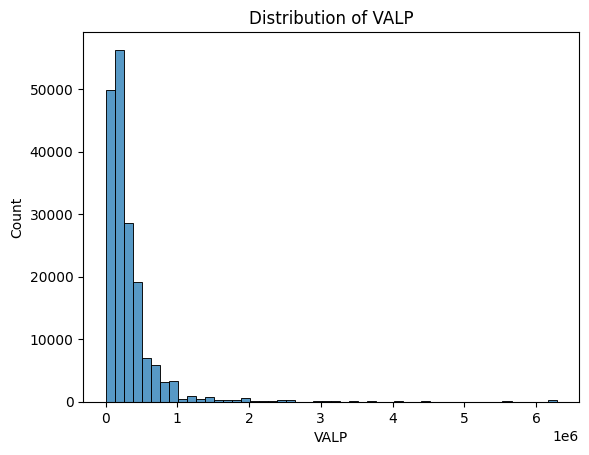


Proportions of households by VALP threshold:
P(VALP < 50,000):  0.075078
P(VALP < 100,000): 0.199282
P(VALP < 200,000): 0.454729

VALP quantiles:
0.10 quantile: 60000.0
0.50 quantile (median): 210000.0
0.75 quantile: 375000.0


In [75]:
# calculations
print("VALP: Property value (household property value).")
print("Type: Quantitative (numeric; typically treated as continuous in analysis).")

# Plot
plt.figure()
sb.histplot(data=acs, x="VALP", bins=50)
plt.title("Distribution of VALP")
plt.xlabel("VALP")
plt.ylabel("Count")
plt.show()

valp = acs["VALP"]
valp_nonmissing = valp.dropna()

prop_lt_50k = (valp_nonmissing < 50000).mean()
prop_lt_100k = (valp_nonmissing < 100000).mean()
prop_lt_200k = (valp_nonmissing < 200000).mean()

print("\nProportions of households by VALP threshold:")
print(f"P(VALP < 50,000):  {prop_lt_50k:.6f}")
print(f"P(VALP < 100,000): {prop_lt_100k:.6f}")
print(f"P(VALP < 200,000): {prop_lt_200k:.6f}")

# Quantiles
q10, q50, q75 = valp_nonmissing.quantile([0.10, 0.50, 0.75])
print("\nVALP quantiles:")
print(f"0.10 quantile: {q10}")
print(f"0.50 quantile (median): {q50}")
print(f"0.75 quantile: {q75}")

### Q1.d

Using the codebook, investigate the `"DIVISION"` column.

* What information is contained in this column?
* What kind of data is this (quantitative (continuous, discrete) or categorical (nominal, ordinal, binary)) ?
* Using the `replace` method for Series objects, replace the numbers in the `"DIVSION"` column with the names of the regions. Call this new column `"DIVISION_name"`.
* Produce a plot that shows the distribution of `"DIVISION_name"` or its key features.
* Calculate the distribution of the `"DIVISION_name"` column and print out the results.

DIVISION: U.S. Census Division (coded 1–9).
Type: Categorical (nominal).


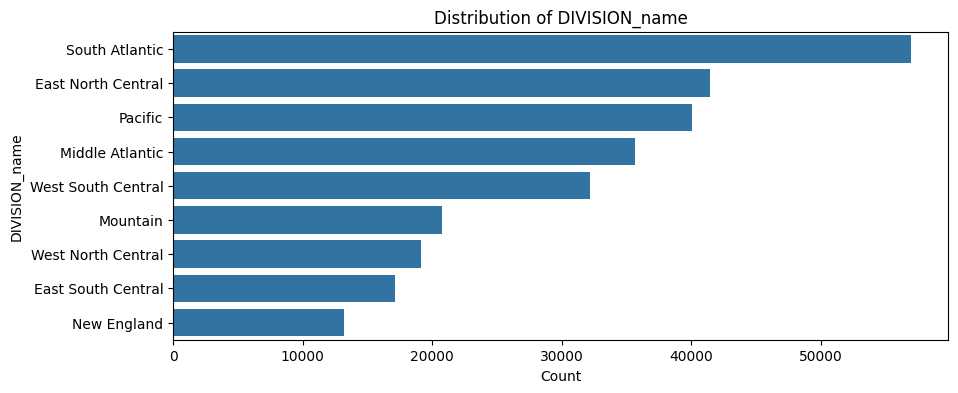


DIVISION_name counts:
DIVISION_name
South Atlantic        57005
East North Central    41451
Pacific               40038
Middle Atlantic       35639
West South Central    32217
Mountain              20784
West North Central    19171
East South Central    17112
New England           13215
Name: count, dtype: int64

DIVISION_name proportions:
DIVISION_name
South Atlantic        0.206068
East North Central    0.149842
Pacific               0.144734
Middle Atlantic       0.128832
West South Central    0.116462
Mountain              0.075132
West North Central    0.069301
East South Central    0.061858
New England           0.047771
Name: proportion, dtype: float64


In [76]:
# calculations
print("DIVISION: U.S. Census Division (coded 1–9).")
print("Type: Categorical (nominal).")

division_map = {
    1: "New England",
    2: "Middle Atlantic",
    3: "East North Central",
    4: "West North Central",
    5: "South Atlantic",
    6: "East South Central",
    7: "West South Central",
    8: "Mountain",
    9: "Pacific",
}

acs["DIVISION_name"] = acs["DIVISION"].replace(division_map)

# Plot distribution
plt.figure(figsize=(10, 4))
sb.countplot(data=acs, y="DIVISION_name", order=acs["DIVISION_name"].value_counts().index)
plt.title("Distribution of DIVISION_name")
plt.xlabel("Count")
plt.ylabel("DIVISION_name")
plt.show()

# Distribution
div_counts = acs["DIVISION_name"].value_counts(dropna=False)
div_props = acs["DIVISION_name"].value_counts(normalize=True, dropna=False)
print("\nDIVISION_name counts:")
print(div_counts)
print("\nDIVISION_name proportions:")
print(div_props)

## Part 2

### Q2.a

Review the `"ST"` column in the code book. We can see that the values for `"ST"` are numbers in the data set. Should we consider these to be *nominal* data? Why or why not?

Answer:
ST is stored as numbers, but they represent state labels (codes), not quantities. So ST should be treated as categorical nominal data (a code for a state), not as numeric where arithmetic meaningfully applies.


### Q2.b

Below are two lists with the state codes and the state names listed in the code book for "ST".

Use these with the `replace` method for Series objects to get a new version of the `"ST"` column with nicer, easier to read names. Call this new column `"ST_name"`. Demonstrate your results by printing out the state name of the row at position 101,206 in the table.

In [77]:
st_nums = [1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 72]
st_names = "Alabama/AL,Alaska/AK,Arizona/AZ,Arkansas/AR,California/CA,Colorado/CO,Connecticut/CT,Delaware/DE,District of Columbia/DC,Florida/FL,Georgia/GA,Hawaii/HI,Idaho/ID,Illinois/IL,Indiana/IN,Iowa/IA,Kansas/KS,Kentucky/KY,Louisiana/LA,Maine/ME,Maryland/MD,Massachusetts/MA,Michigan/MI,Minnesota/MN,Mississippi/MS,Missouri/MO,Montana/MT,Nebraska/NE,Nevada/NV,New Hampshire/NH,New Jersey/NJ,New Mexico/NM,New York/NY,North Carolina/NC,North Dakota/ND,Ohio/OH,Oklahoma/OK,Oregon/OR,Pennsylvania/PA,Rhode Island/RI,South Carolina/SC,South Dakota/SD,Tennessee/TN,Texas/TX,Utah/UT,Vermont/VT,Virginia/VA,Washington/WA,West Virginia/WV,Wisconsin/WI,Wyoming/WY,Puerto Rico/PRa".split(",")

In [78]:
# solution
st_map = dict(zip(st_nums, st_names))
acs["ST_name"] = acs["ST"].replace(st_map)

pos = 101_206
print(f"State name at row position {pos}: {acs['ST_name'].iloc[pos]}")


State name at row position 101206: Iowa/IA


### Q2.c

Create a table that is just the subset of of the overall table that is the subset of households that are in Michigan. Demonstrate your results by printing out the number of rows this table.

In [79]:
# solution
mi = acs.loc[acs["ST_name"].str.startswith("Michigan/MI", na=False)].copy()
oh = acs.loc[acs["ST_name"].str.startswith("Ohio/OH", na=False)].copy()

print(f"Rows in Michigan table: {mi.shape[0]}")
print(f"Rows in Ohio table:     {oh.shape[0]}")

Rows in Michigan table: 9330
Rows in Ohio table:     10466


Create a table for households in Ohio. Again show the number of rows.

### Q2.d

Plot the distribution of "HINCP" for Michigan:

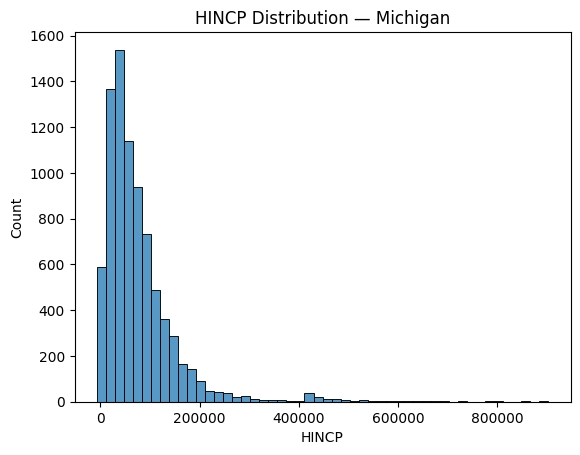

In [80]:
# solution
plt.figure()
sb.histplot(data=mi, x="HINCP", bins=50)
plt.title("HINCP Distribution — Michigan")
plt.xlabel("HINCP")
plt.ylabel("Count")
plt.show()

Repeat for Ohio:

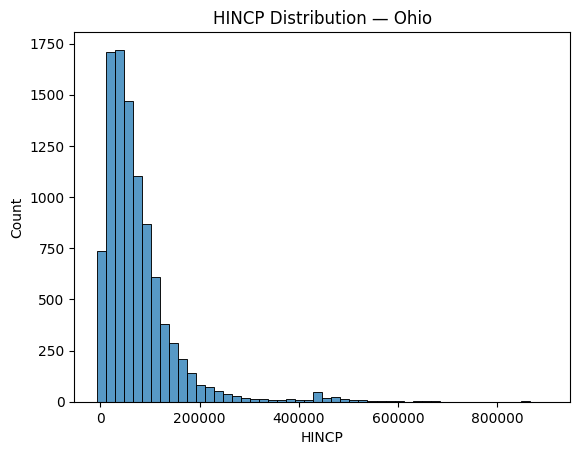

In [81]:
# solution
plt.figure()
sb.histplot(data=oh, x="HINCP", bins=50)
plt.title("HINCP Distribution — Ohio")
plt.xlabel("HINCP")
plt.ylabel("Count")
plt.show()

### Q2.e

Find the mean of the "HINCP" column for households in the state of Michigan. Find the mean for "HINCP" for Ohio households. Compute and print out the difference.

In [82]:
# solution
mi_mean = mi["HINCP"].mean(skipna=True)
oh_mean = oh["HINCP"].mean(skipna=True)
diff = mi_mean - oh_mean

print(f"Mean(HINCP) Michigan: {mi_mean}")
print(f"Mean(HINCP) Ohio:     {oh_mean}")
print(f"Difference (MI - OH): {diff}")

Mean(HINCP) Michigan: 77375.2441079497
Mean(HINCP) Ohio:     76049.96143194173
Difference (MI - OH): 1325.2826760079624


Re-express the difference of means a proportion of the mean household income in Ohio and print out the result.

In [83]:
# solution
prop_diff = diff / oh_mean
print(f"Difference as proportion of Ohio mean: {prop_diff}")

Difference as proportion of Ohio mean: 0.017426474005433627


### Q2.f

Find the interquartile range (IQR) of "HINCP" for Michigan and Ohio. Report the ratio of IQRs (Michigan/Ohio).

In [84]:
# solution
def iqr(series: pd.Series) -> float:
    s = series.dropna()
    return s.quantile(0.75) - s.quantile(0.25)

mi_iqr = iqr(mi["HINCP"])
oh_iqr = iqr(oh["HINCP"])
ratio = mi_iqr / oh_iqr

print(f"IQR(HINCP) Michigan: {mi_iqr}")
print(f"IQR(HINCP) Ohio:     {oh_iqr}")
print(f"Ratio IQRs (MI/OH):  {ratio}")

IQR(HINCP) Michigan: 68900.0
IQR(HINCP) Ohio:     66700.0
Ratio IQRs (MI/OH):  1.0329835082458771


## Part 3

### Q3.a

Look up the `RNTP` variable in the codebook. Answer the following:

- What does the `RNTP` column measure?
- What is the range of the values?
- Compute the proportion of rows in the `acs` table that are missing the `RNTP` variable.

In [85]:
# solution
print("RNTP: Monthly rent (gross rent), typically in dollars for renter-occupied housing.")
print("Range: numeric values (nonnegative), with missing values for non-renters / not applicable.")
missing_rntp_prop = acs["RNTP"].isna().mean()
print(f"Proportion missing RNTP: {missing_rntp_prop:.6f}")

RNTP: Monthly rent (gross rent), typically in dollars for renter-occupied housing.
Range: numeric values (nonnegative), with missing values for non-renters / not applicable.
Proportion missing RNTP: 0.732844


### Q3.b

Create a table that has only rows with non-missing `RNTP` values. Show the number of rows.

In [86]:
# solution
acs_rent = acs.loc[~acs["RNTP"].isna()].copy()
print(f"Rows with non-missing RNTP: {acs_rent.shape[0]}")

Rows with non-missing RNTP: 73904


In [87]:
rntp_mean = acs_rent["RNTP"].mean()
rntp_std = acs_rent["RNTP"].std()
print(f"Mean(RNTP): {rntp_mean}")
print(f"Std(RNTP):  {rntp_std}")


Mean(RNTP): 1030.9102890235981
Std(RNTP):  663.433897981278


### Q3.c

Compute the mean and standard deviation of the "RNTP" column in your new table.

### Q3.d

Perform a simulation in which you sample $n = 20$ subjects from the table created in Q3.b. In each sample, compute the sample mean. Use 10,000 replications.

* Plot the results of your simulation using an appropriate plot.
* Compute the mean the sample means from your simulation, print it out.
* Compute the standard deviation of the sample from you simulation, print it out.

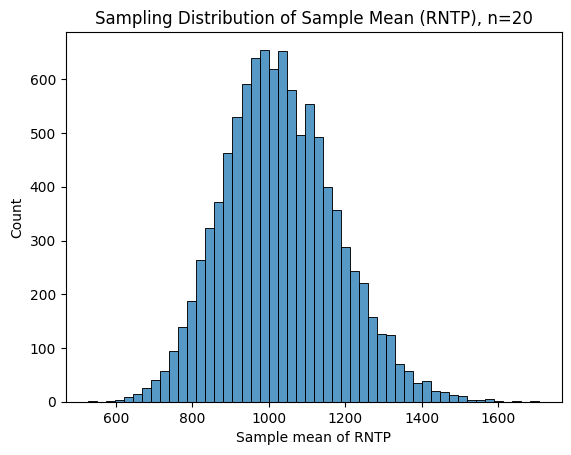

Mean of sample means (n=20): 1030.43319
Std dev of sample means (n=20): 147.87485241453797


In [88]:
#solution
def simulate_sample_means(data, column, n, reps, seed=None):
    if seed is not None:
        np.random.seed(seed)
    sample_means = []
    for _ in range(reps):
        sample = data[column].sample(n=n, replace=True, random_state=None)
        sample_means.append(sample.mean())
    return pd.Series(sample_means)

means_20 = simulate_sample_means(acs_rent, "RNTP", n=20, reps=10_000, seed=1)

plt.figure()
sb.histplot(x=means_20, bins=50)
plt.title("Sampling Distribution of Sample Mean (RNTP), n=20")
plt.xlabel("Sample mean of RNTP")
plt.ylabel("Count")
plt.show()

print(f"Mean of sample means (n=20): {means_20.mean()}")
print(f"Std dev of sample means (n=20): {means_20.std()}")

### Q3.e

Repeat Q3.d, but now use $n = 100$:

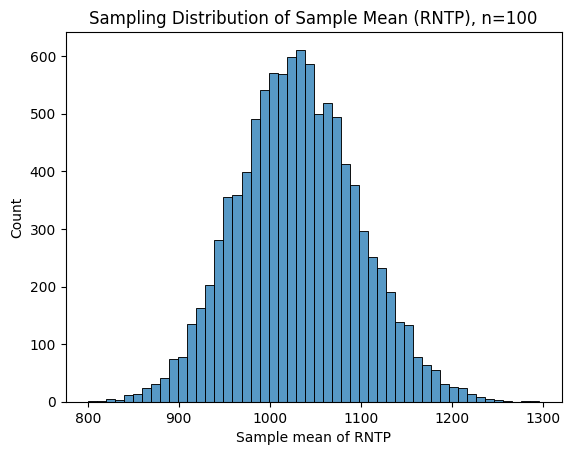

Mean of sample means (n=100): 1030.6150699999998
Std dev of sample means (n=100): 66.28064748384843


In [89]:
# solution
means_100 = simulate_sample_means(acs_rent, "RNTP", n=100, reps=10_000, seed=2)

plt.figure()
sb.histplot(x=means_100, bins=50)
plt.title("Sampling Distribution of Sample Mean (RNTP), n=100")
plt.xlabel("Sample mean of RNTP")
plt.ylabel("Count")
plt.show()

print(f"Mean of sample means (n=100): {means_100.mean()}")
print(f"Std dev of sample means (n=100): {means_100.std()}")

### Q3.f

For each of the simulations in Q3.e and Q3.f, compute the proportions of sample means that are within one standard deviation (of the simulated values).

In [90]:
# solution
m20, s20 = means_20.mean(), means_20.std()
m100, s100 = means_100.mean(), means_100.std()

prop_within_1sd_20 = (np.abs(means_20 - m20) < s20).mean()
prop_within_1sd_100 = (np.abs(means_100 - m100) < s100).mean()

print(f"Proportion within 1 SD (n=20):  {prop_within_1sd_20:.6f}")
print(f"Proportion within 1 SD (n=100): {prop_within_1sd_100:.6f}")

Proportion within 1 SD (n=20):  0.686500
Proportion within 1 SD (n=100): 0.682400
